# Project Title: Exploratory data analysis and clustering on covid-19(coronavirus).

# Importing the libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
p_data=pd.read_csv("C:/Users/NIKS/Desktop/Machine_Learning_Project/corona/patient.csv")
r_data=pd.read_csv("C:/Users/NIKS/Desktop/Machine_Learning_Project/corona/route.csv")
t_data=pd.read_csv("C:/Users/NIKS/Desktop/Machine_Learning_Project/corona/time.csv")

In [3]:
p_data.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [4]:
r_data.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [5]:
t_data.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


# Analyzing the Patients dataset

In [6]:
p_data.describe()
#p_data.describe(include='all')

,id,birth_year,infection_order,infected_by,contact_number
count,4212.000000,292.000000,35.000000,62.000000,32.000000
mean,2106.500000,1973.184932,2.257143,330.741935,96.843750
std,1216.043996,17.336573,1.357828,458.786744,224.669522
min,1.000000,1937.000000,1.000000,3.000000,0.000000
25%,1053.750000,1959.000000,1.000000,29.250000,2.750000
50%,2106.500000,1972.000000,2.000000,126.000000,16.500000
75%,3159.250000,1987.000000,3.000000,372.000000,69.750000
max,4212.000000,2018.000000,6.000000,1768.000000,1160.000000


In [7]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 14 columns):
id                  4212 non-null int64
sex                 318 non-null object
birth_year          292 non-null float64
country             4212 non-null object
region              305 non-null object
group               76 non-null object
infection_reason    130 non-null object
infection_order     35 non-null float64
infected_by         62 non-null float64
contact_number      32 non-null float64
confirmed_date      4212 non-null object
released_date       28 non-null object
deceased_date       13 non-null object
state               4212 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 460.8+ KB


In [8]:
# creating the copy of the patient dataset
p_data1=p_data.copy()

In [266]:
p_data.isna().sum()

id                             0
sex                         3894
birth_year                  3920
country                        0
region                      3907
group                       4136
infection_reason            4082
infection_order             4177
infected_by                 4150
contact_number              4180
confirmed_date                 0
released_date               4184
deceased_date               4199
state                          0
age                         3920
age_group                      0
release_time                4184
death_time                  4199
duration_since_confirmed    4171
duration_days               4171
state_by_gender             3894
dtype: int64

In [10]:
#Crerating a age so as to determine the age of patients whose birth year is given.
p_data['age']=2020-p_data['birth_year']

In [14]:
#Creating a function to define age group of 15 year span.

import math 
def age_group(age):
    if(age>=0):
        if age % 15 != 0:
            lower=(math.floor(age/15))*15
            upper=(math.ceil(age/15))*15-1
            return(str(lower)+'-'+str(upper))
        else:
            lower = int(age)
            upper = int(age + 14) 
            return f"{lower}-{upper}"
    return('Unknown')

Creating a column age group in the patient table and defining the age group according to the function accordingly.

In [15]:
p_data['age_group']=p_data['age'].apply(age_group)

In [16]:
p_data.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,age_group
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,30-44
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,45-59
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,45-59
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,45-59
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated,33.0,30-44


In [19]:
import numpy as np
p_data['age_group'].values

array(['30-44', '45-59', '45-59', ..., 'Unknown', 'Unknown', 'Unknown'],
      dtype=object)

In [21]:
#Converting the date columns to datetime format.

p_data['confirmed_date']=pd.to_datetime(p_data['confirmed_date'])
p_data['released_date']=pd.to_datetime(p_data['released_date'])
p_data['deceased_date']=pd.to_datetime(p_data['deceased_date'])

Calculating release time,death time and duration after confirmation and storing it in a new column accordingly.

In [23]:
p_data['release_time']=p_data['released_date']-p_data['confirmed_date']
p_data['death_time']=p_data['deceased_date']-p_data['confirmed_date']
p_data["duration_since_confirmed"] = p_data[["release_time", "death_time"]].min(axis=1)
p_data["duration_days"] = p_data["duration_since_confirmed"].dt.days

In [26]:
# Calculating the percentage of recovery,isolated and deceased patients.
rp = p_data.loc[p_data["state"] == "released"].shape[0]
dp = p_data.loc[p_data["state"] == "deceased"].shape[0]
ip = p_data.loc[p_data["state"]== "isolated"].shape[0]
rp=rp/p_data.shape[0]
dp=dp/p_data.shape[0]
ip=ip/p_data.shape[0]
print("The % of recovery is:- "+ str(rp*100) )
print("The % of deceased is:- "+ str(dp*100) )
print("The % of isolated is:- "+ str(ip*100) )

The % of recovery is:- 0.6647673314339981
The % of deceased is:- 0.30864197530864196
The % of isolated is:- 99.02659069325736


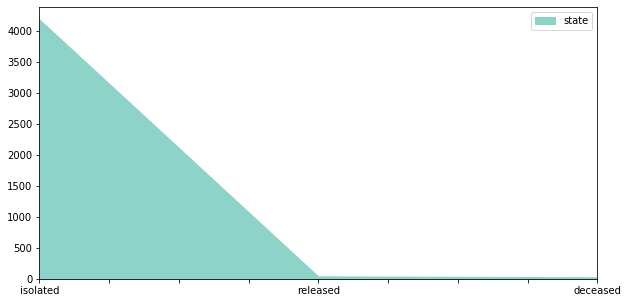

In [66]:
k=p_data['state'].value_counts()
k.plot(kind='area',figsize=(10,5),colormap='Set3',legend=True)
plt.legend(loc=0,bbox_to_anchor=(1,1));

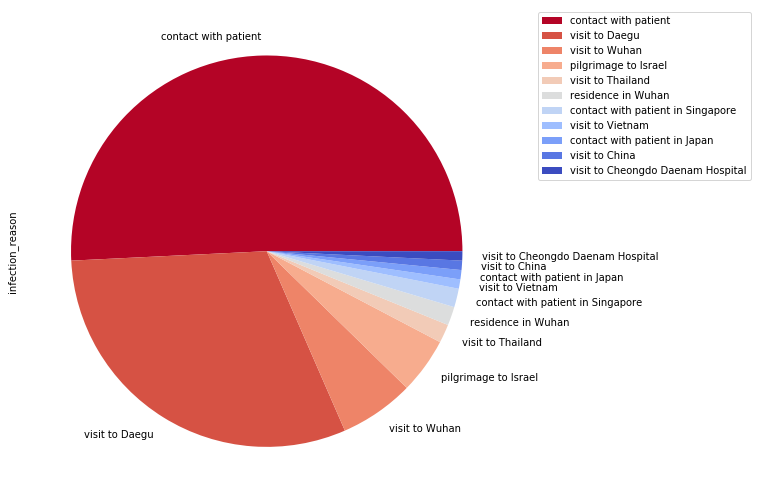

In [105]:
# Distribution of patients based upon infection.

k=p_data['infection_reason'].value_counts()
k.plot(kind='pie',figsize=(10,9),legend=True,colormap='coolwarm_r')
plt.legend(loc=1,bbox_to_anchor=(1.5,1))

In [109]:
#split the state columns in three states.

released=p_data[p_data['state']=='released']
deceased=p_data[p_data['state']=='deceased']
isolated=p_data[p_data['state']=='isolated']
                

In [110]:
# Creatting the new columns state by gender
p_data['state_by_gender']=p_data['state']+"-"+p_data['sex']

# Age wise Distribution of patients depending upon their state.

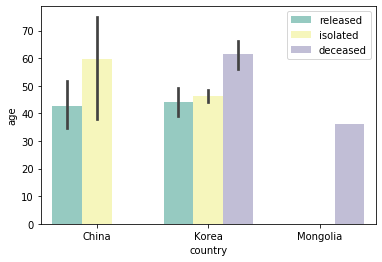

In [119]:
sns.barplot(x='country',y='age',hue='state',data=p_data,palette='Set3')
plt.legend(loc='best')

# Gender wise distribution of patients in different countries.

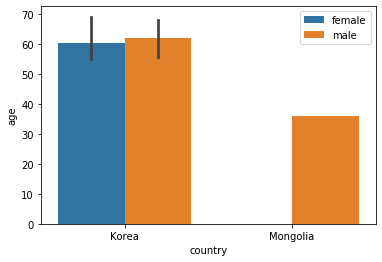

In [122]:
sns.barplot(x='country',y='age',hue='sex',data=deceased)
plt.legend()

# Patient count based on their state and their infection reason.

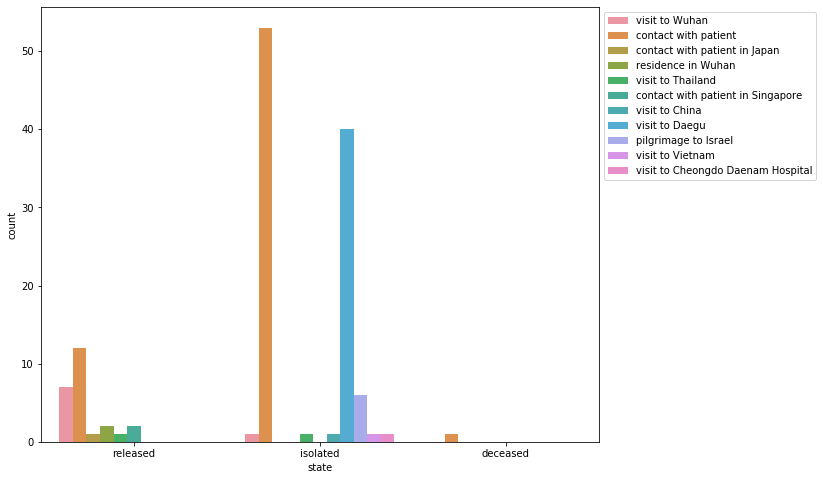

In [129]:
plt.figure(figsize=(10,8))
sns.countplot(data=p_data,x='state',hue='infection_reason')
plt.legend(loc=0,bbox_to_anchor=(1,1))

# Gender wise distribution of patient depending upon their state.

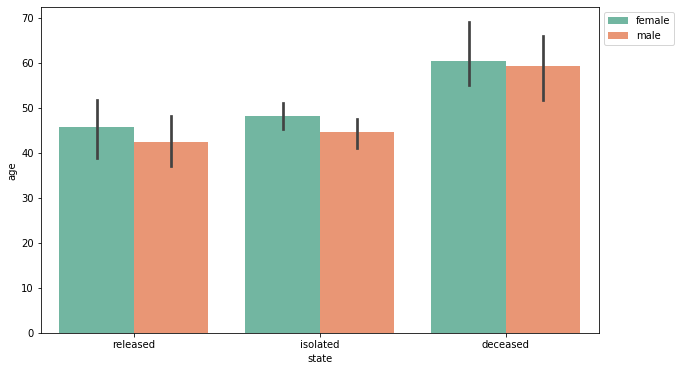

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(data=p_data,x='state',y='age',hue='sex',palette='Set2')
plt.legend(loc=0,bbox_to_anchor=(1,1))
plt.show()

# Distribution of patient with age and gender

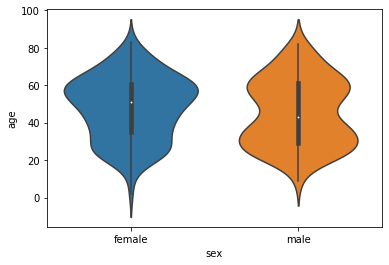

In [153]:
sns.violinplot(data=p_data,x='sex',y='age')
#plt.legend()
plt.show()

# Disributiion of patient with age, gender and country.

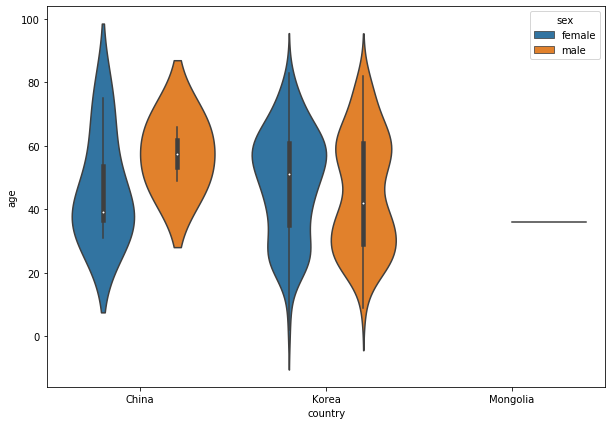

In [155]:
plt.figure(figsize=(10,7))
sns.violinplot(data=p_data,x='country',y='age',hue='sex')

In [164]:
daily_count= p_data.groupby(p_data.confirmed_date).id.count()

In [172]:
accumulated_count=daily_count.cumsum()

# Accumulated confirmed count of patient till date.

Text(0.5, 1.0, 'Accumulated Confirmed Count')

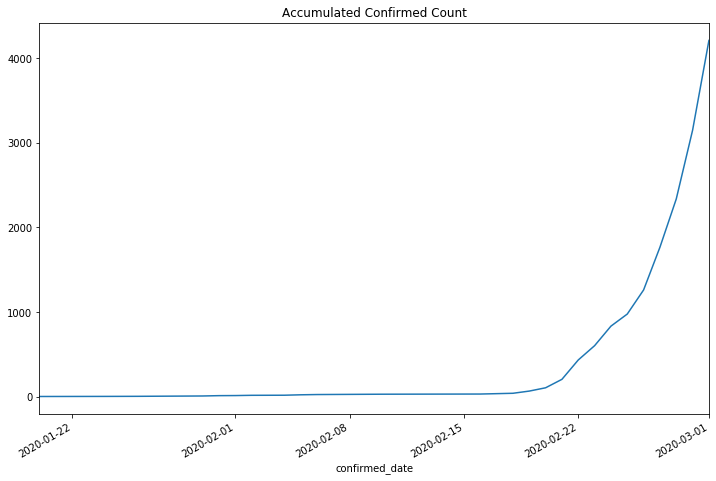

In [173]:
plt.figure(figsize=(12,8))
accumulated_count.plot()
plt.title('Accumulated Confirmed Count')

# Age distribution of patient deending upon their state. 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


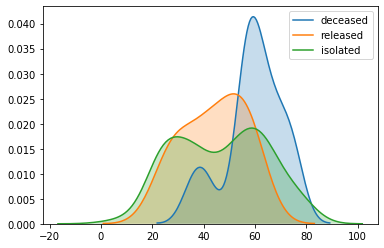

In [176]:
sns.kdeplot(data=deceased['age'],label='deceased',shade=True)
sns.kdeplot(data=released['age'],label='released',shade=True)
sns.kdeplot(data=isolated['age'],label='isolated',shade=True)

# Count deceased patient gender wise 

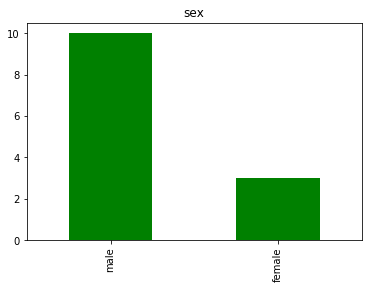

In [197]:
#plt.figure(figsize=(12,6))
plt.title('sex')
deceased.sex.value_counts().plot.bar(color='g')


# Distribution of patient based on their age-group and state by gender. 

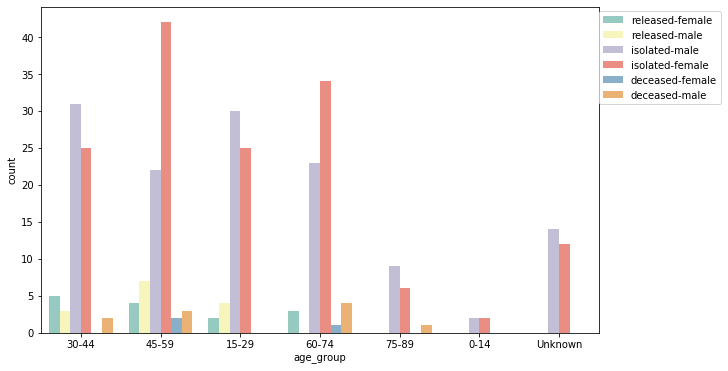

In [226]:
plt.figure(figsize=(10,6))
sns.countplot(data=p_data,x='age_group',hue='state_by_gender',palette='Set3')
plt.legend(loc=(1,0.7));

# Distribution of patient by region, age and state.

<Figure size 720x648 with 0 Axes>

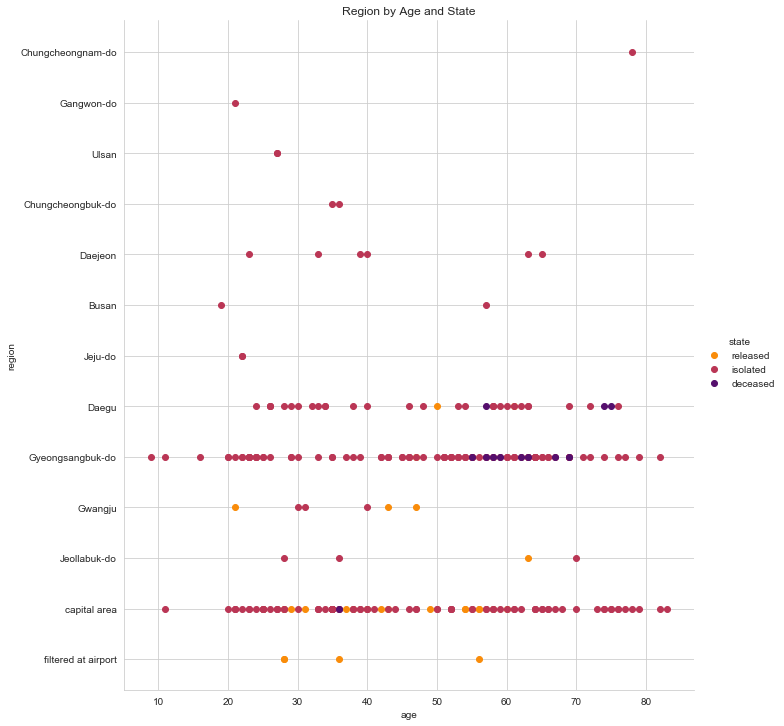

In [242]:
plt.figure(figsize=(10,9))
sns.set_style('whitegrid')
sns.FacetGrid(p_data,hue='state',height=10,palette='inferno_r').map(plt.scatter,'age','region').add_legend()
plt.title('Region by Age and State')
plt.show()

# Count of patient gender wise from those who died.

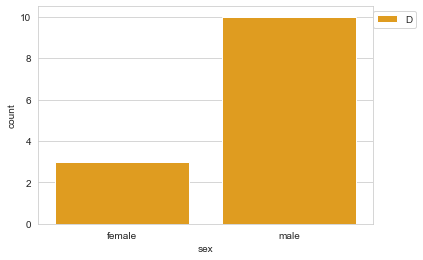

In [277]:
#plt.figure(figsize=[12,7])
sns.countplot(data=deceased,x='sex',color='orange')
plt.legend("Disease",loc=(1,0.9))

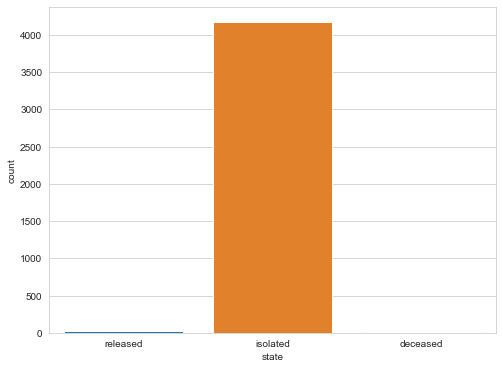

In [375]:
plt.figure(figsize=[8,6])
sns.countplot(data=p_data,x='state');

# Analyzing the Route dataset.

In [279]:
r_data.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [280]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
id           68 non-null int64
date         68 non-null object
province     68 non-null object
city         68 non-null object
visit        68 non-null object
latitude     68 non-null float64
longitude    68 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ KB


In [282]:
clus=r_data.loc[:,['id','latitude','longitude']]
clus.head(8)

,id,latitude,longitude
0,1,37.460459,126.440680
1,1,37.478832,126.668558
2,2,37.562143,126.801884
3,2,37.567454,127.005627
4,3,37.460459,126.440680
5,3,37.524978,127.027718
6,3,37.503359,127.049177
7,3,37.524669,127.015911


# Bulid a clusters 

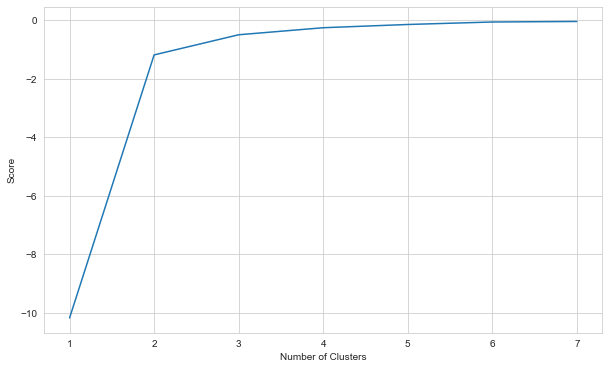

In [374]:
from sklearn.cluster import KMeans
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

k_clusters=range(1,8)
kmeans=[KMeans(n_clusters=i)for i in k_clusters]
y_axis=r_data[['latitude']]
x_axis=r_data[['longitude']]
score=[kmeans[i].fit(y_axis).score(y_axis) for i in range(len(kmeans))]
plt.figure(figsize=(10,6))
plt.plot(k_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [291]:
kmeans= KMeans(n_clusters=4, init='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label']= kmeans.fit_predict(clus[clus.columns[1:3]])
centers= kmeans.cluster_centers_
labels= kmeans.predict(clus[clus.columns[1:3]])

# Clusters of patient depending upon their geographocal location. 

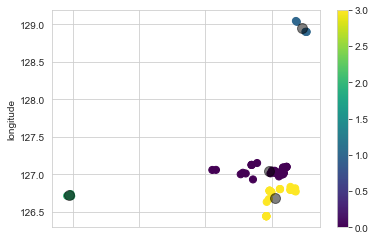

In [294]:
clus.plot.scatter(x='latitude',y='longitude',c=labels, s=50,cmap='viridis')
plt.scatter(centers[:,0], centers[:,1],c='black',s=100,alpha=0.5)

In [321]:
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7,tiles='Stamen Terrain')

for lat, lon,city in zip(r_data['latitude'], r_data['longitude'],r_data['city']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('City: ' + str(city) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

#"Stamen" (Terrain, Toner, and Watercolor)
#"Cloudmade" (Must pass API key)

# Count of patients according to city

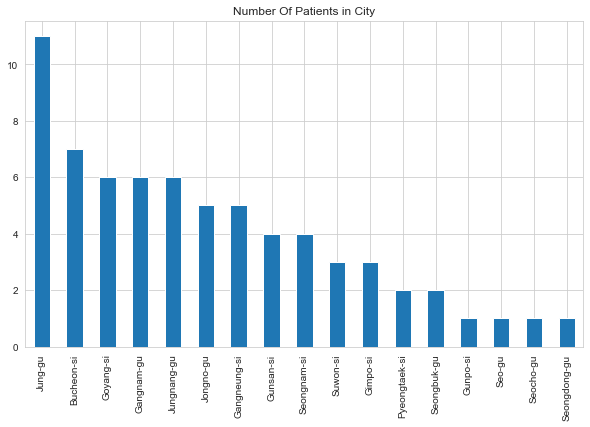

In [325]:
plt.figure(figsize=(10,6))
plt.title('Number Of Patients in City')
r_data.city.value_counts().plot.bar()

# Count of patient by State

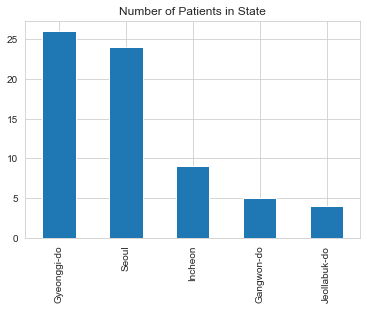

In [333]:
plt.title("Number of Patients in State")
r_data.province.value_counts().plot.bar()

# Count of Patients by type of place visited before getting infected

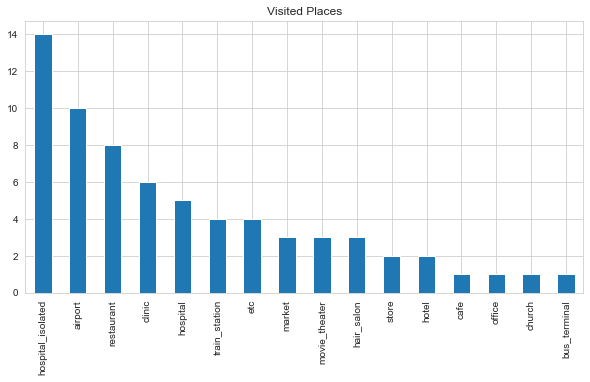

In [335]:
plt.figure(figsize=(10,5))
plt.title('Visited Places')
r_data.visit.value_counts().plot.bar()

# Count of patient by state

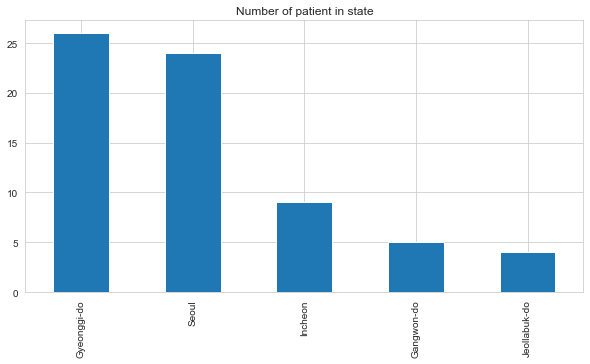

In [336]:
plt.figure(figsize=(10,5))
plt.title('Number of patient in state')
r_data.province.value_counts().plot.bar()

# Count of patient by type of place visited before getting infected 

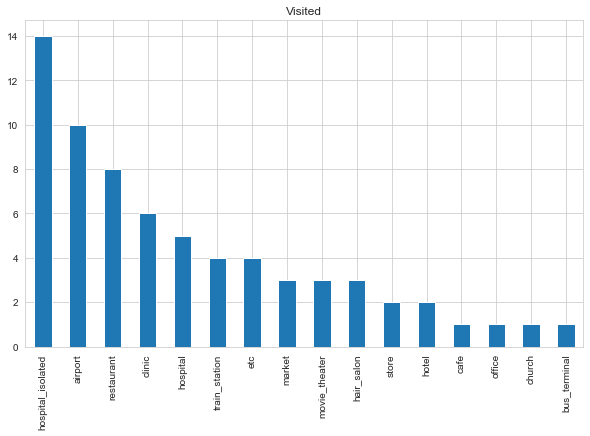

In [373]:
plt.figure(figsize=(10,6))
plt.title('Visited')
r_data.visit.value_counts().plot.bar()

Text(0.5, 1.0, 'Time from confirmation to release or death')

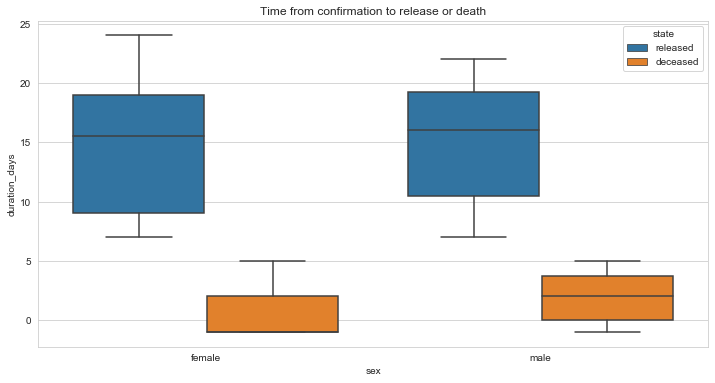

In [339]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex',y='duration_days',hue='state',
            hue_order=['released','deceased'],data=p_data
           )
plt.title('Time from confirmation to release or death')

# Time from confirmation to release or death based on age group

Text(0.5, 1.0, 'Time from confirmaion to release or death')

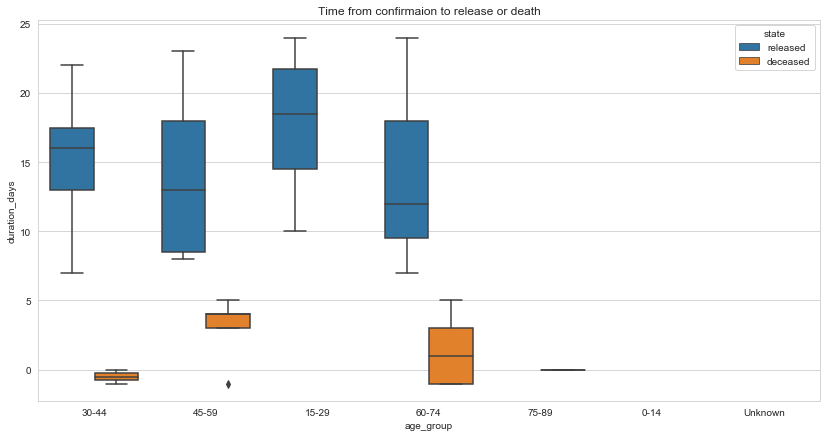

In [345]:
plt.figure(figsize=(14,7))
sns.boxplot(x='age_group',y='duration_days',hue='state',
           hue_order=['released','deceased'],
           data=p_data)
plt.title('Time from confirmaion to release or death')

# Trends of different diseases dataset

In [346]:
t_data.describe()

,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,15200.309524,10047.285714,390.500000,8.309524,2.642857,2609.309524,1704.285714,100.285714,0.738095,0.523810
std,27021.163220,16575.307579,906.531913,9.984105,5.634482,4557.333428,3205.270395,231.460188,1.326273,1.234427
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,262.500000,210.500000,7.250000,0.000000,0.000000,59.000000,44.000000,0.000000,0.000000,0.000000
50%,2854.000000,2117.500000,27.000000,3.500000,0.000000,496.500000,401.000000,1.000000,0.000000,0.000000
75%,12694.750000,10921.750000,90.750000,16.000000,0.750000,1872.000000,1273.250000,44.750000,1.000000,0.000000
max,109591.000000,71580.000000,4212.000000,31.000000,22.000000,15536.000000,15857.000000,1062.000000,6.000000,5.000000


In [353]:
t_data_cold=t_data[['date','new_confirmed']]
t_data_flu=t_data[['date','new_released']]
t_data_pneumonia=t_data[['date','new_deceased']]

# Trend of patient who are newly confirmed

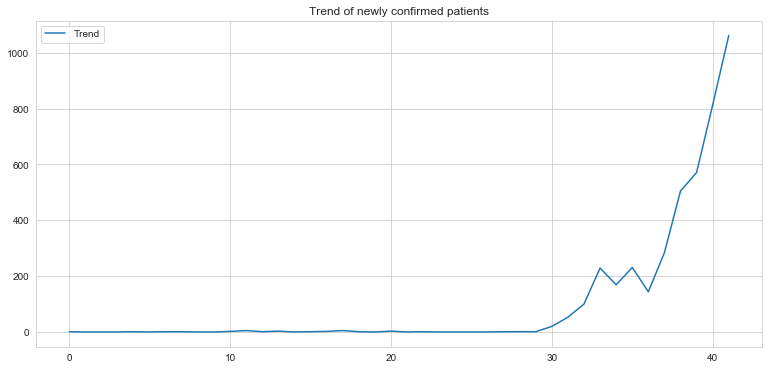

In [363]:
plt.figure(figsize=(13,6))
plt.plot(t_data.new_confirmed,label="Trend")
plt.title('Trend of newly confirmed patients')
plt.legend(loc='best')

# Trend of patients by new released

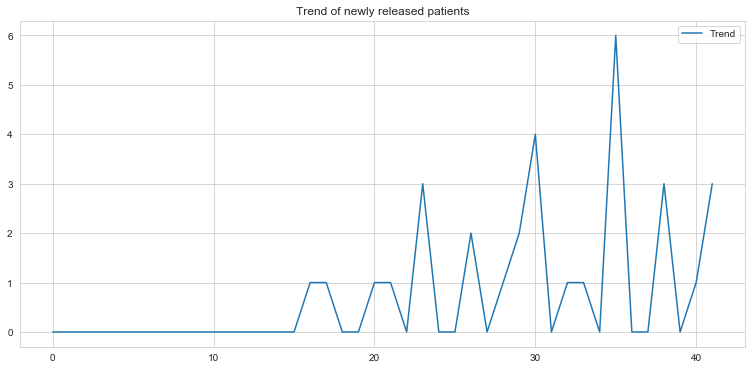

In [364]:
plt.figure(figsize=(13,6))
plt.plot(t_data.new_released,label="Trend")
plt.title('Trend of newly released patients')
plt.legend(loc='best')

# Trend of patients who newly deceased

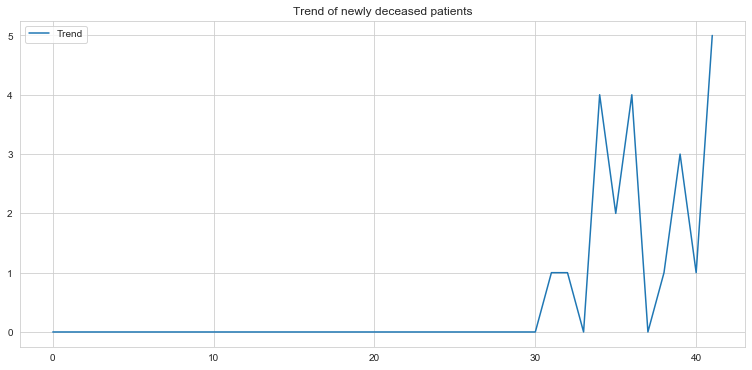

In [365]:
plt.figure(figsize=(13,6))
plt.plot(t_data.new_deceased,label="Trend")
plt.title('Trend of newly deceased patients')
plt.legend(loc='best')

# Trend of new test on patient 

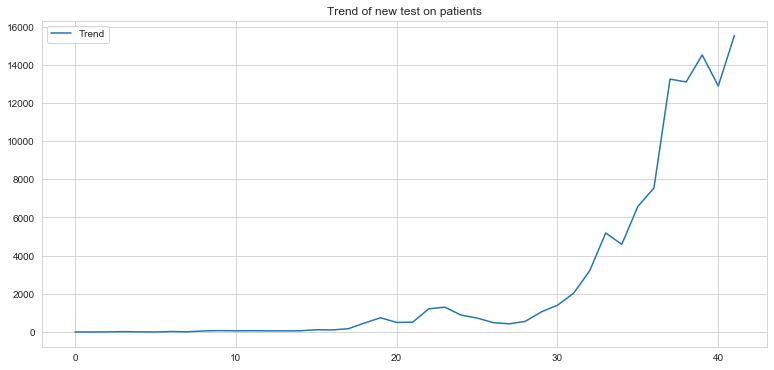

In [370]:
plt.figure(figsize=(13,6))
plt.plot(t_data.new_test,label="Trend")
plt.title('Trend of new test on patients')

plt.legend(loc='best')

# Trend of patients who found negatve 

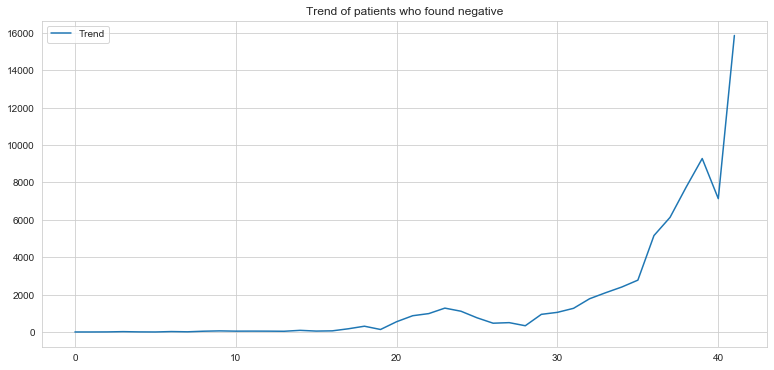

In [371]:
plt.figure(figsize=(13,6))
plt.plot(t_data.new_negative,label="Trend")
plt.title('Trend of patients who found negative')
plt.legend(loc='best')